## Introduction 

The United States Bureau of Labor Statistics (BLS) surveys and calculates the monthly unemployment rate. The unemployment rate is the percentage of individuals in the labor force without a job. While unemployment rate isn't perfect, it's a commonly used proxy for the health of the economy.
<br>
<br>We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as unrate.csv, and made it available in this mission.

First, we read the data and change the date column into a series of datetime values

In [1]:
import pandas as pd

unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
print(unrate.head(12))

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


To create the line chart, we'll use the matplotlib library, which allows us to:
- Quickly create common plots using high-level functions
- Extensively tweak plots
- Create new kinds of plots from the ground up

And the general workflow is: 
- Create a plot using data 
- Customize the appearance of the plot 
- Display the plot 
- Edit and repeat until satisfied
<br>
<br>
<br>
The basic command is as follows: 

In [2]:
import matplotlib.pyplot as plt

plt.plot()
plt.show();

<Figure size 640x480 with 1 Axes>

The first example would be the unemployment data from 1948. In the graph, we need: 
- x-values should be the first 12 values in the DATE column
- y-values should be the first 12 values in the VALUE column
- Display the plot.

C:\Users\pakhl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


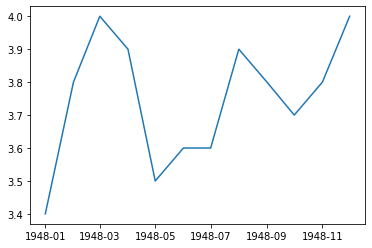

In [3]:
data = unrate.head(12)
plt.plot(data['DATE'], data['VALUE'])

While the y-axis looks fine, the x-axis tick labels are too close together and are unreadable.
<br>
<br>
We can **rotate the x-axis tick labels by 90 degrees** so they don't overlap. 
<br>
<br>The xticks() function within pyplot lets you customize the behavior of the x-axis ticks. You'll notice that there's a rotation parameter that accepts degrees of rotation as a parameter. 
<br>We can specify degrees of rotation using a float or integer value.
<br>
<br>There are many functions for tweaking the x-axis have matching functions for the y-axis. 
<br>For example, the y-axis counterpart to the xticks() function is the yticks() function.

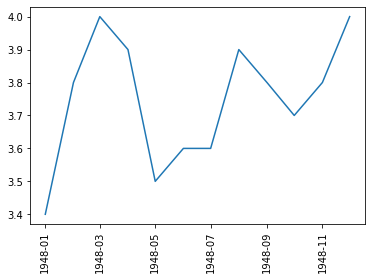

In [4]:
plt.plot(data['DATE'], data['VALUE'])
plt.xticks(rotation=90)
plt.show()

Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road.
<br>
<br>Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:
- xlabel(): accepts a string value, which gets set as the x-axis label.
- ylabel(): accepts a string value, which is set as the y-axis label.
- title(): accepts a string value, which is set as the plot title.

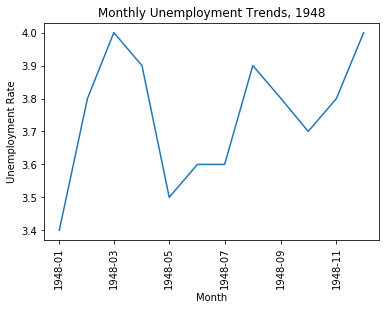

In [5]:
plt.plot(data["DATE"],data["VALUE"])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

Besides a single chart, we can create multiple line charts to help us compare monthly unemployment trends across time.

The underlying concept when we create a single plot is: 
- A container for all plots was created (returned as a Figure object)
- A container for the plot was positioned on a grid (the plot returned as an Axes object)
- Visual symbols were added to the plot (using the Axes methods)

**A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.**
<br>
<br>We can manually create a figure by calling pyplot.figure():

In [6]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

Instead of only calling the pyplot function, we assigned its return value to a variable (fig). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:
- Values on the x-axis and y-axis
- Ticks on the x-axis and y-axis
- all visual symbols, such as markers, lines, gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object. 
<br>
<br> For example, if we need to add 2 graphs into the same row:

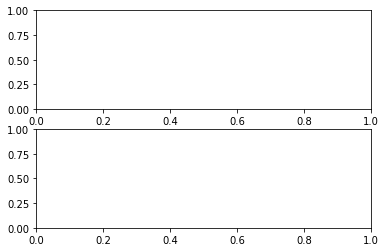

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show();

To generate a line chart within an Axes object (single chart in the figure), we need to call Axes.plot() and pass in the data you want plotted. 
<br>
<br>Like pyplot.plot(), the Axes.plot() will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. 
<br>It will also generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call Axes.plot() and pass in the data we want to use in that plot.
<br>
<br>Below is an example of a data from 1948 and 1949

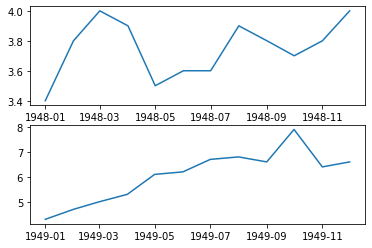

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1 = plt.plot(unrate['DATE'].head(12), unrate['VALUE'].head(12))
ax2 = fig.add_subplot(2,1,2)
ax2 = plt.plot(unrate['DATE'][12:24], unrate['VALUE'][12:24])
plt.show()

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same
<br>
<br> This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure.
<br>
<br>We can use the figsize parameter when we call plt.figure():

In [9]:
fig = plt.figure(figsize=(width, height))

NameError: name 'width' is not defined

For the plot we generated in the last screen, set the width of the plotting area to 12 inches and the height to 5 inches.

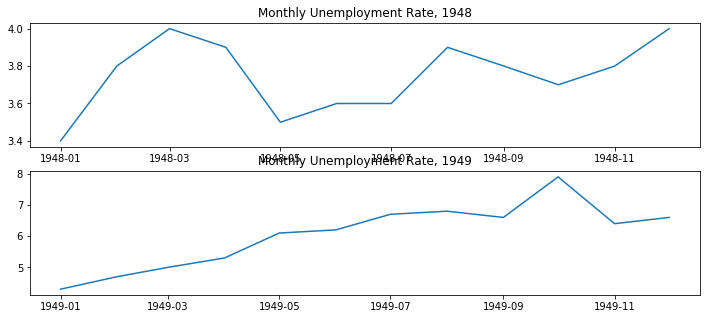

In [10]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

So we know that in every year there are 12 rows data. 

If we want to show the result for multiple years, we should use a loop to input the data. 
<br>
<br>We provide an integer argument to range(), and it produces a sequence of integers starting at zero, and going up to (but not including) the argument's value. 
<br>
<br>As an example of how we can use this to produce plots, let's look at how we could produce a plot similar to the one on the previous screen using a loop and range()

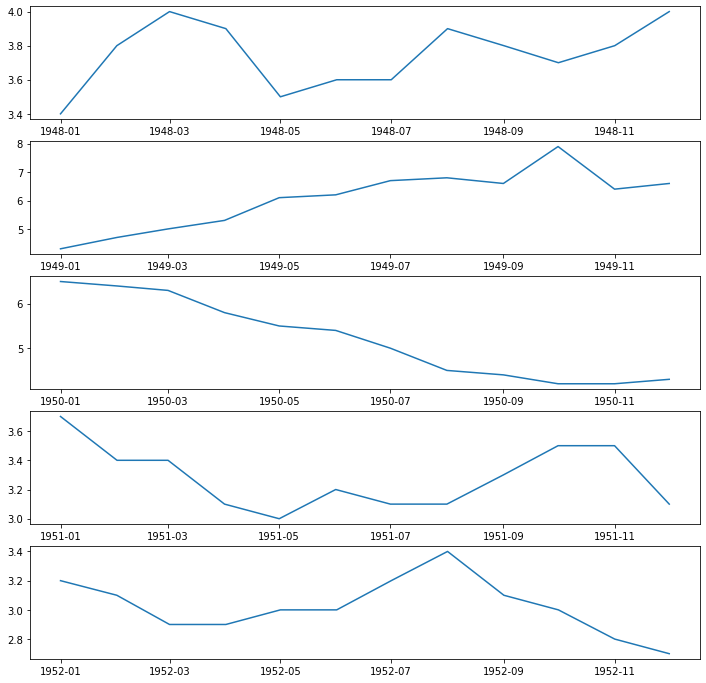

In [11]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i * 12
    end_index = (i+1) * 12
    subset = unrate[start_index: end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()  

There is another way that we can present the figure i.e a single chart with same x and y axis, but with different colors. 

First is to extract  the month values from the DATE column and assign them to a new column:

In [12]:
unrate['MONTH'] = unrate['DATE'].dt.month

Then we continue to build the chart with the month value as x-axis

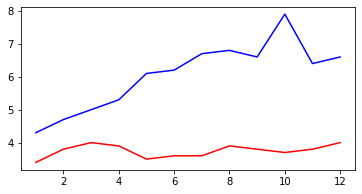

In [13]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

And we can extend it to 5 year with for loop, similar to the example above: 

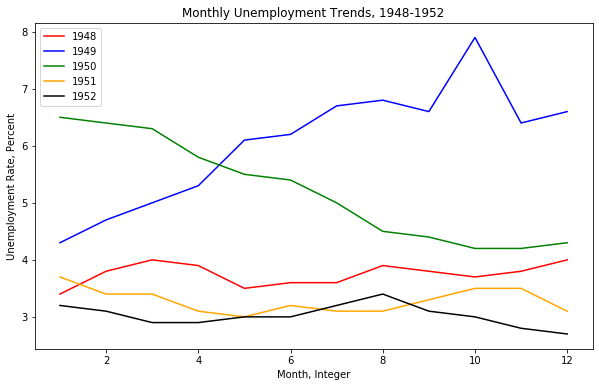

In [14]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc = 'upper left')    
plt.title('Monthly Unemployment Trends, 1948-1952')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')

plt.show()